In [1]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive 
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/ejemplos/"  
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.getcwd() + "/datasets/"


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = data_dir + "pokemon.csv"
df = pd.read_csv(filename )


df.head()
#df.describe()
#df.info()
#df.shape

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


array([[<Axes: title={'center': 'Speed'}>]], dtype=object)

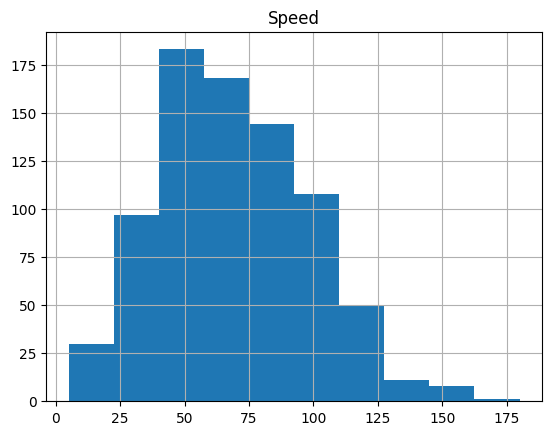

In [4]:
df.hist(column='Speed')

In [5]:
# otras posibles opciones
df = df.groupby(["Speed"]).size()
df = df.reset_index()
# la size quedó con nombre de columna 0, mejor renombrar
df = df.rename(columns={0:"Cantidad"})
df

,Speed,Cantidad
0,5,2
1,10,3
2,15,9
3,20,15
4,22,1
...,...,...
103,140,2
104,145,3
105,150,4
106,160,1


<BarContainer object of 108 artists>

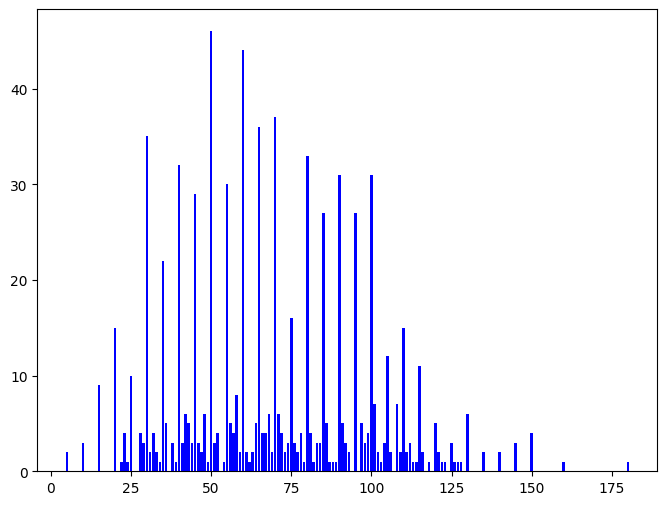

In [6]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df["Speed"], df["Cantidad"],   color="blue")



In [7]:
bins = np.linspace(0, df["Speed"].max(), 10)
df["bins"] = pd.cut(df.Speed, bins=bins)



/tmp/ipykernel_31102/3051868764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby("bins").count()


<Axes: xlabel='bins'>

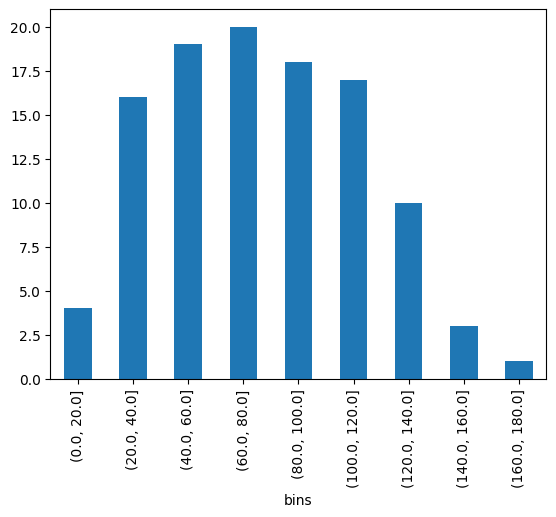

In [8]:
df = df.groupby("bins").count()
df["Cantidad"].plot(kind='bar')
